In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer

from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [16]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [17]:
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [18]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [19]:
df['MEDV'] = dataset.target

In [20]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
X = df
y = X.pop('MEDV')

In [22]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
# Adapted from https://www.kaggle.com/ffisegydd/sklearn-multicollinearity-class 

from statsmodels.stats.outliers_influence import variance_inflation_factor

class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        
        # The statsmodel function will fail with NaN values, as such we have to impute them.
        # By default we impute using the median value.
        # This imputation could be taken out and added as part of an sklearn Pipeline.
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)

    def fit(self, X, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(X)
        return self

    def transform(self, X, y=None):
        print('ReduceVIF transform')
        columns = X.columns.tolist()
        if hasattr(self, 'imputer'):
            X = pd.DataFrame(self.imputer.transform(X), columns=columns)
        return ReduceVIF.calculate_vif(X, self.thresh)

    @staticmethod
    def calculate_vif(X, thresh=5.0):
        # Taken from https://stats.stackexchange.com/a/253620/53565 and modified
        dropped=True
        while dropped:
            variables = X.columns
            dropped = False
            vif = [variance_inflation_factor(X[variables].values, X.columns.get_loc(var)) for var in X.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {X.columns[maxloc]} with vif={max_vif}')
                X = X.drop([X.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return X
transformer = ReduceVIF()

# Only use 10 columns for speed in this example
X = transformer.fit_transform(X[X.columns[:]], y)

X.head()

ReduceVIF fit
ReduceVIF transform
Dropping PTRATIO with vif=85.02954731061801
Dropping NOX with vif=73.89417092973886
Dropping TAX with vif=57.72034668372636
Dropping RM with vif=39.069063497543915
Dropping AGE with vif=14.000757811090512
Dropping B with vif=10.074224239820206
Dropping INDUS with vif=6.9000773644875855


C:\Users\simon\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,CRIM,ZN,CHAS,DIS,RAD,LSTAT
0,0.00632,18.0,0.0,4.0900,1.0,4.98
1,0.02731,0.0,0.0,4.9671,2.0,9.14
2,0.02729,0.0,0.0,4.9671,2.0,4.03
3,0.03237,0.0,0.0,6.0622,3.0,2.94
4,0.06905,0.0,0.0,6.0622,3.0,5.33


In [24]:
X

,CRIM,ZN,CHAS,DIS,RAD,LSTAT
0,0.00632,18.0,0.0,4.0900,1.0,4.98
1,0.02731,0.0,0.0,4.9671,2.0,9.14
2,0.02729,0.0,0.0,4.9671,2.0,4.03
3,0.03237,0.0,0.0,6.0622,3.0,2.94
4,0.06905,0.0,0.0,6.0622,3.0,5.33
...,...,...,...,...,...,...
501,0.06263,0.0,0.0,2.4786,1.0,9.67
502,0.04527,0.0,0.0,2.2875,1.0,9.08
503,0.06076,0.0,0.0,2.1675,1.0,5.64
504,0.10959,0.0,0.0,2.3889,1.0,6.48


In [25]:
X.to_excel('boston.xlsx', engine='xlsxwriter')

### Check again for Multi-co-linearity
We also need to understand the relationship between independent variables (dataset attributes) in the dataset and whether or not there is multi-co-linearity between them. Multi-co-linearity occurs where greater values of one independent variable corrosponds to greater values in another independent variable, the opposite also holds true where lesser values of one independent variable corrosponds to lesser values in another independent variable.

The importance of this check was discussed in several blog posts. As discussed by Springer (1997) Multi-co-linearity is a problem because "for regression analysis it undermines the statistical significance of an independent variable". In laymans terms, if independent variables correlate strongly with each other they should be removed from regression analysis.

We can see that RAD (accessibility to radial highways) and TAX (full-value property-tax rate per $10,000) are strongly correlated with eachother, as are DIS ( weighted distances to five Boston employment centres) and AGE (proportion of owner-occupied units built prior to 1940)

## Add more explaination here

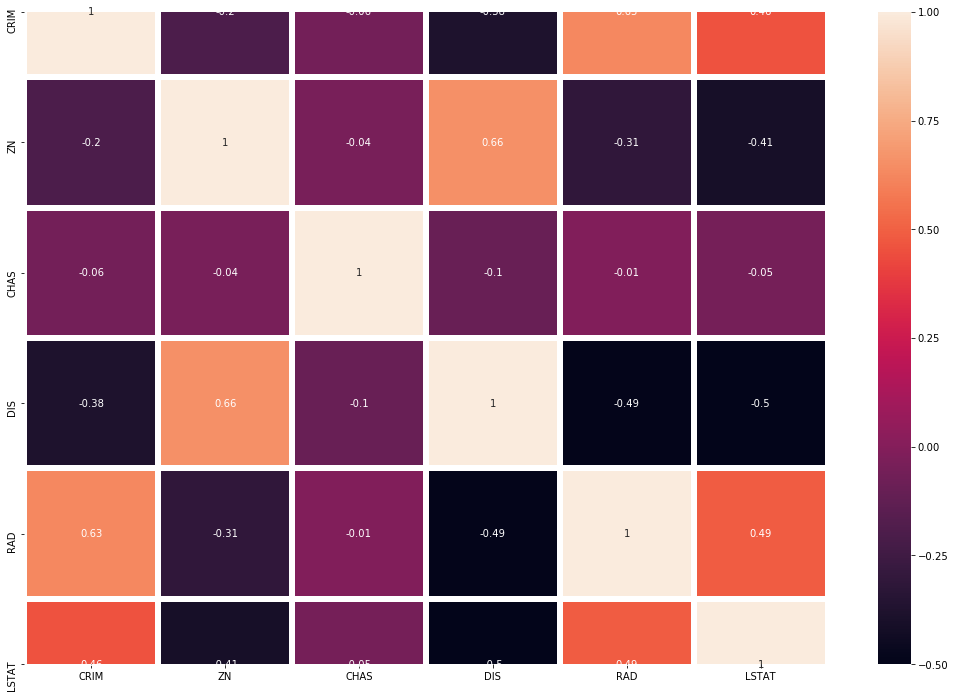

In [26]:
# Create a heat-map for all attributes to help identify multi-co-linearity
f, ax = plt.subplots(figsize=(18, 12))
correlation_matrix = X.corr().round(2)
sns.heatmap(data=correlation_matrix, linewidth=5, annot=True, ax=ax)

### References
https://www.kaggle.com/ffisegydd/sklearn-multicollinearity-class